# EXL Case Study - Term Deposit Subscription

## SS Warriors

## 1. Importing Packages and Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_excel('Worksheet in EXL_EQ_CaSE_Term_Deposit_Lead_Prediction_Final_Draft_PD_V01.xlsx')
test=pd.read_excel('Worksheet in EXL_EQ_CaSE_Term_Deposit_Lead_Prediction_Final_Draft_PD_V01 2.xlsx')

## 2. Understanding the data set

In [3]:
train.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [4]:
test.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [6]:
for col in test.select_dtypes(include='object').columns:
    print (col)
    print(test[col].unique())

customer_id
['id_43823' 'id_10523' 'id_43951' ... 'id_16678' 'id_26369' 'id_31483']
job_type
['management' 'technician' 'services' 'retired' 'blue-collar' 'admin.'
 'self-employed' 'housemaid' 'entrepreneur' 'unemployed' 'student'
 'unknown']
marital
['single' 'married' 'divorced' nan]
education
['tertiary' 'secondary' 'primary' 'unknown']
default
['no' 'yes']
housing_loan
['yes' 'no']
personal_loan
['no' 'yes' nan]
communication_type
['unknown' 'cellular' 'telephone']
month
['jun' 'feb' 'may' 'apr' 'nov' 'aug' 'oct' 'jul' 'jan' 'dec' 'mar' 'sep']
prev_campaign_outcome
['unknown' 'failure' 'other' 'success']


In [7]:
for col in train.select_dtypes(include='object').columns:
    print (col)
    print(train[col].unique())

customer_id
['id_32289' 'id_40992' 'id_41178' ... 'id_44679' 'id_4841' 'id_1723']
job_type
['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital
['married' 'single' 'divorced' nan]
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing_loan
['no' 'yes']
personal_loan
['yes' 'no' nan]
communication_type
['cellular' 'unknown' 'telephone']
month
['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome
['other' 'unknown' 'failure' 'success']


In [8]:
train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [9]:
train.shape

(23880, 17)

In [10]:
test.shape

(7767, 16)

### 2.1 Checking and Handling NULL values and Separating Categorical and Discrete Variables

In [11]:
train.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [12]:
train1 = train.customer_age.fillna(train.customer_age.mean(), inplace=True)

In [13]:
train1 = train

In [14]:
train1['marital'] = train1['marital'].fillna(train1['marital'].mode()[0])

In [15]:
train1.balance.fillna(train1.balance.median(), inplace=True)

In [16]:
train1['personal_loan'] = train1['personal_loan'].fillna(train1['personal_loan'].mode()[0])

In [17]:
train1['num_contacts_in_campaign'] = train1['num_contacts_in_campaign'].fillna(train1['num_contacts_in_campaign'].mode()[0])

In [19]:
test1 = test

In [20]:
test1.isnull().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [21]:
test1.customer_age.fillna(test1.customer_age.mean(), inplace=True)

In [22]:
test1['marital'] = test1['marital'].fillna(test1['marital'].mode()[0])

In [23]:
test1.balance.fillna(test1.balance.median(), inplace=True)

In [24]:
test1['personal_loan'] = test1['personal_loan'].fillna(test1['personal_loan'].mode()[0])

In [25]:
test1['num_contacts_in_campaign'] = test1['num_contacts_in_campaign'].fillna(test1['num_contacts_in_campaign'].mode()[0])

In [26]:
categorical_features=[feature for feature in train.columns if ((train[feature].dtypes=='O') & (feature not in ['term_deposit_subscribed','customer_id']))]
categorical_features

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [27]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is job_type and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing_loan and number of categories are 2
The feature is personal_loan and number of categories are 2
The feature is communication_type and number of categories are 3
The feature is month and number of categories are 12
The feature is prev_campaign_outcome and number of categories are 4


###### Insight - <br>
1. 9 categorical features
2. Job type and month have highest number of categorical values

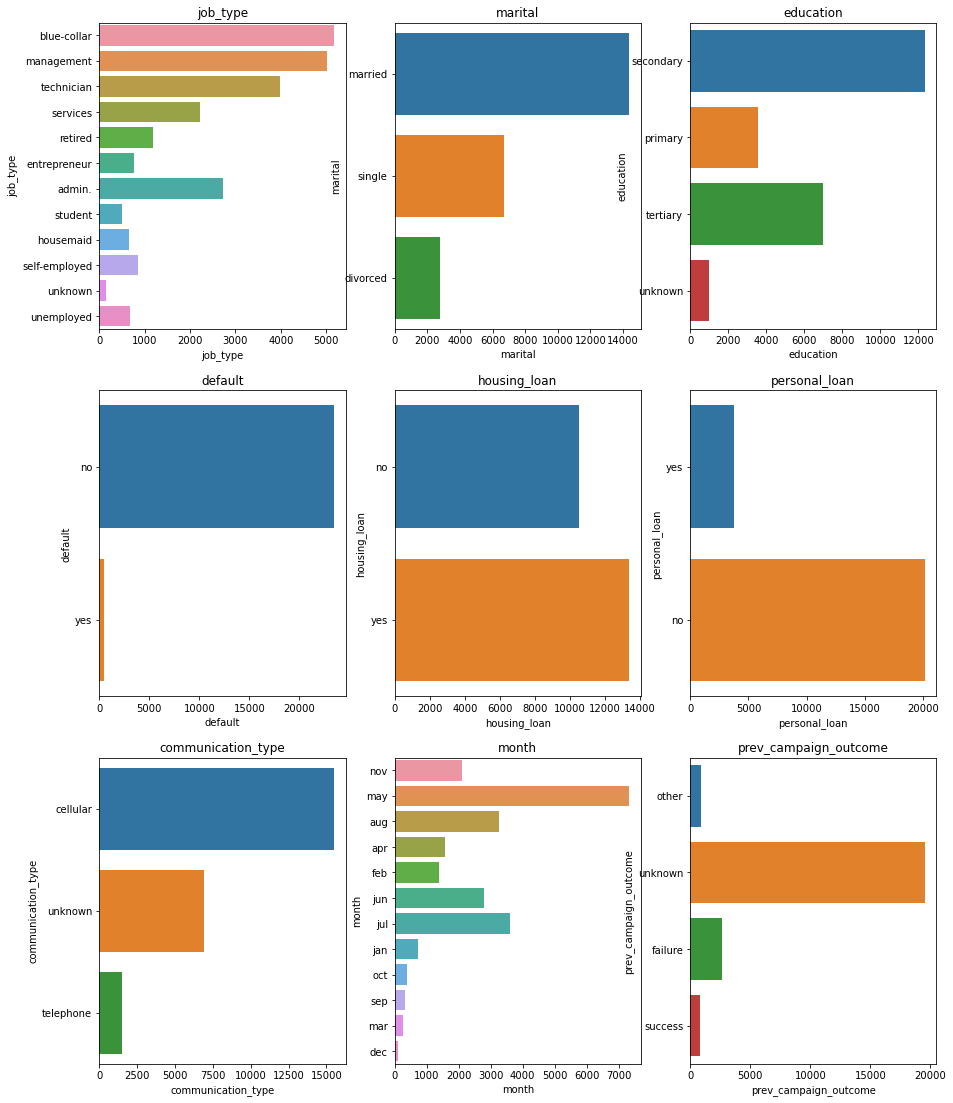

In [28]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

##### Insight - <br> 
1. Clients with job_type as blue collar are highest in number and unknown is least
2. Clients who are married are in high records and least are divorced
3. Clients with education background as secondary are the highest 
4. Default seems not to play an important role as it has value of no high and yes very low(can drop it)
5. Data in the month of may is high and less in december

In [29]:
features_na=[features for features in train.columns if train[features].isnull().sum()>0]
for feature in features_na:
    print(feature, np.round(train[feature].isnull().mean(), 4), '%missing values')
else:
    print('No missing value found')

No missing value found


In [30]:
for column in train.columns:
    print(column, train[column].nunique())

customer_id 23880
customer_age 76
job_type 12
marital 3
education 4
default 2
balance 5811
housing_loan 2
personal_loan 2
communication_type 3
day_of_month 31
month 12
last_contact_duration 312
num_contacts_in_campaign 44
num_contacts_prev_campaign 38
prev_campaign_outcome 4
term_deposit_subscribed 2


#### Insight- <br>

No feature with only one value

In [31]:
for categorical_feature in categorical_features:
    print(train.groupby(['term_deposit_subscribed', categorical_feature]).size())

term_deposit_subscribed  job_type     
0                        admin.           2436
                         blue-collar      4833
                         entrepreneur      711
                         housemaid         615
                         management       4390
                         retired           922
                         self-employed     745
                         services         2042
                         student           362
                         technician       3582
                         unemployed        571
                         unknown           135
1                        admin.            281
                         blue-collar       334
                         entrepreneur       62
                         housemaid          48
                         management        616
                         retired           254
                         self-employed     100
                         services          182
                     

#### Insight-<br>
1. The ratio of number of clients in a particular category of job subscribed to term deposit to the number of clients who didn't subscribe to term deposit. <br>
   admin: 0.115<br>
   blue collar: 0.0691<br>
   entrepreneur: 0.0872<br>
   housemaid:0.078<br>
   management: 0.140<br>
   retired: 0.2754<br>
   self-employed: 0.134<br>
   services: 0.0891<br>
   student:0.386<br>
   technichian:0.11<br>
   unemployed: 0.182<br>
   unknown: 0.140<br>

   1.Retired and student category show high interest on term deposit subscribed.<br>
   2.People having housing loan do not seem much interested.<br>
   3.If pre campagin outcome that is prev_campaign_outcome=success then, there is high chance of client to show interest on     term deposit.<br>
   4.In the month of March,clients show higher interest in term deposit.<br>
   
   

2. The ratio of number of clients in a particular month subscribed to term deposit to the number of clients who didn't subscribe to term deposit.<br>
   Jan:0.102<br>
   Feb:0.181<br>
   March:1.071<br>
   April:0.210<br>
   May:0.06<br>
   June:0.100<br>
   July:0.084<br>
   August:0.106<br>
   Sept:0.94<br>
   Oct:0.744<br>
   Nov:0.102<br>
   Dec:0.79<br>

   1.In the  month of March, September, October and December, client show high interest to term deposit.<br>
   2.In month of May, records are high but client interst ratio is very less<br>


In [32]:
numerical_features = [feature for feature in train.columns if ((train[feature].dtypes != 'O') & (feature not in ['term_deposit_subscribed']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  6


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,34.0,934.0,18,704,2.0,1
1,41.0,1352.0,13,893,2.0,0
2,57.0,495.0,18,796,4.0,0
3,37.0,650.0,26,880,1.0,0
4,29.0,265.0,19,795,2.0,0


In [33]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [34]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['term_deposit_subscribed']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

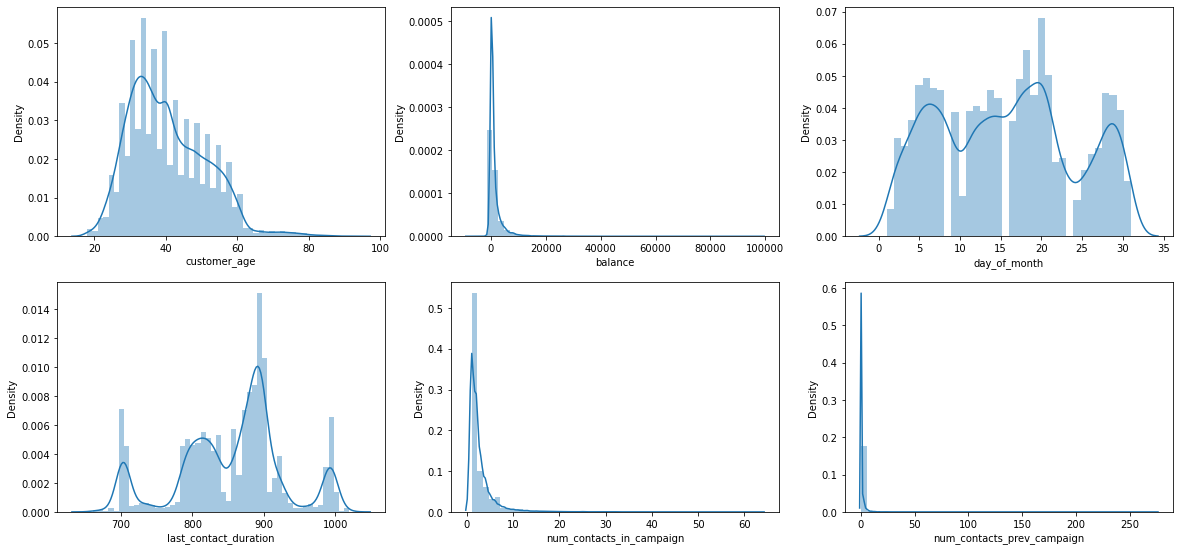

In [35]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

#### Insight-<br>

   1. It seems customer_age, day_of_month, last_contact_duration are distributed normally.<br>
   2. Balance, num_contacts_in_campaign and num_contacts_prev_camapign are heavely skewed towards left and seems to be have some outliers.<br>
   3. Client show interest in term deposit who had discussion for longer duration.

### 2.2 Finding and Removing Outliers

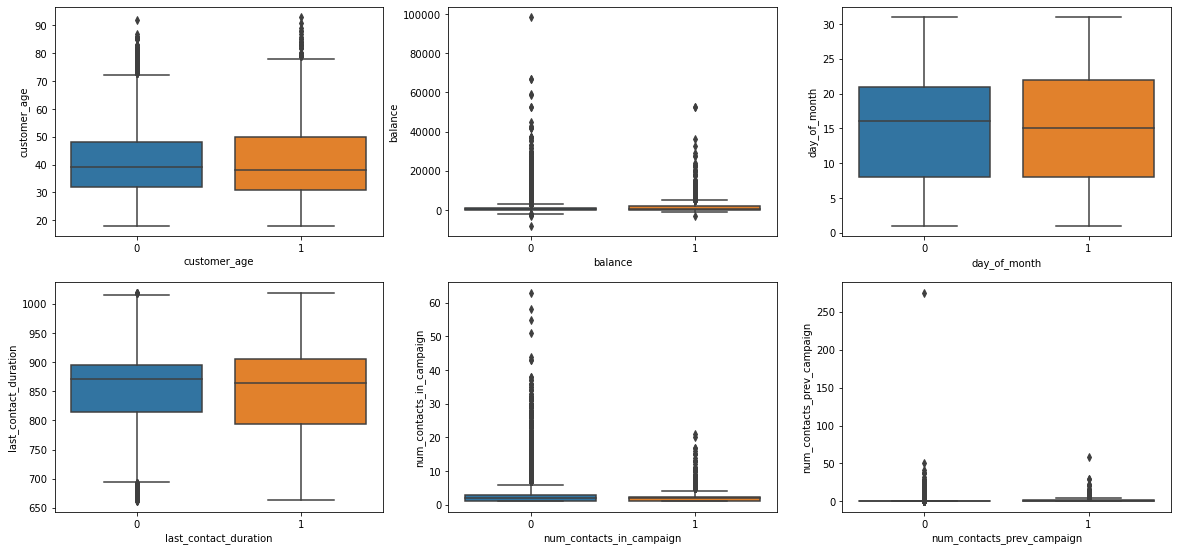

In [36]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="term_deposit_subscribed", y= train[feature], data=train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

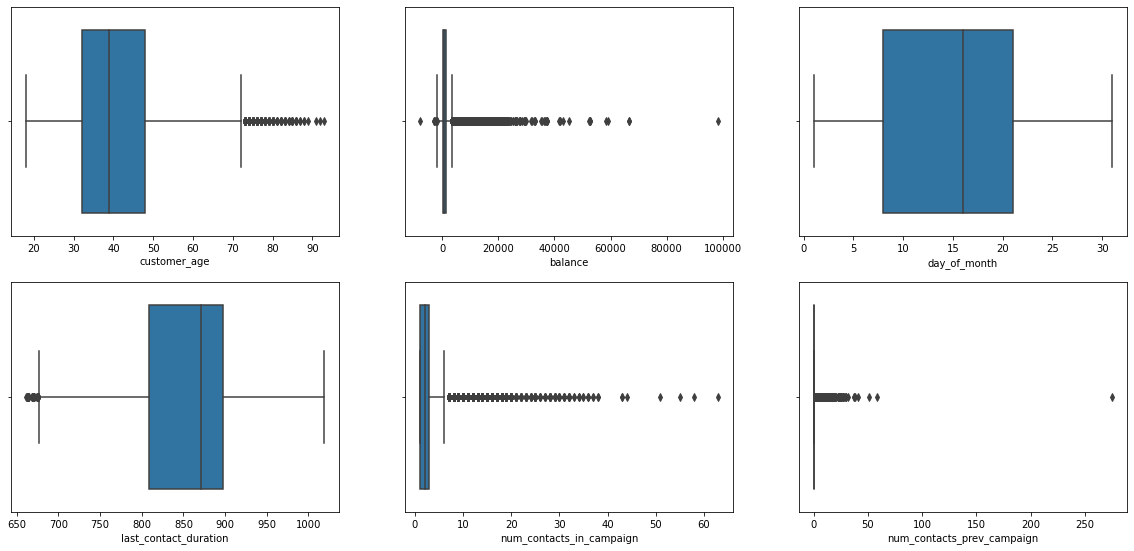

In [37]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

#### Insight-<br>

customer_age, balance, last_contact_duration, num_contacts_in_campaign and num_contacts_prev_campaign has some outliers

In [ ]:
numerical_features=sorted(numerical_features)
outliers=[]
q1,q3 = np.percentile(numerical_features,[25,75])
IQR= q3-q1
lower_fence=q1-(1.5*IQR)
higher_fence= q3+(1.5*IQR)
for i in numerical_features:
    if i<lower_feance and i>higher_fence:
        outliers.append(i)
outliers

### 2.3 Data Visualization through Heat Map

<AxesSubplot:>

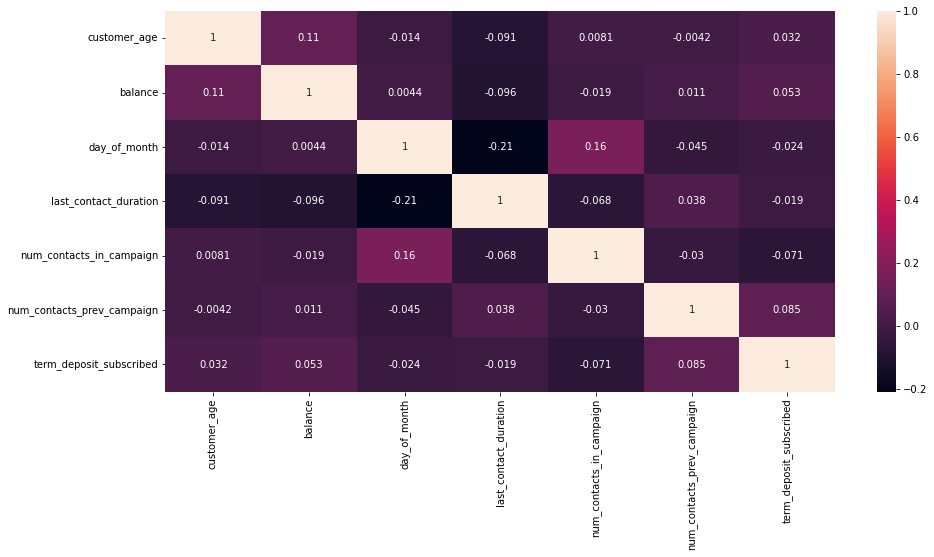

In [44]:
cor_mat=train1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

#### Insight-<br>

It seems no feature is heavily correlated with other features.

### 2.4 Further Analysis of Data through Grouping and Dropping Unwanted Features

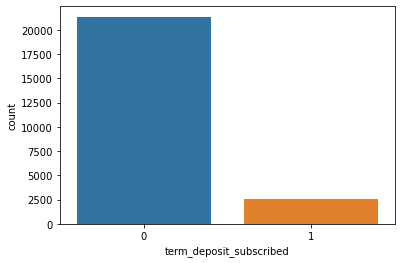

In [45]:
sns.countplot(x='term_deposit_subscribed',data=train1)
plt.show()

In [46]:
train1['term_deposit_subscribed'].groupby(train1['term_deposit_subscribed']).count()

term_deposit_subscribed
0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

In [47]:
df=train1.copy()

In [48]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [49]:
df.groupby(['term_deposit_subscribed','default']).size()

term_deposit_subscribed  default
0                        no         20943
                         yes          401
1                        no          2509
                         yes           27
dtype: int64

In [50]:
df.drop(['default'],axis=1, inplace=True)

In [51]:
df.groupby('customer_age',sort=True)['customer_age'].count()

customer_age
18.0     37
19.0     27
20.0     46
21.0     56
22.0    113
       ... 
88.0      2
89.0      1
91.0      1
92.0      1
93.0      1
Name: customer_age, Length: 76, dtype: int64

#### Insight-<br>

customer_age lies between 18 to 93 years

In [52]:
df.groupby(['term_deposit_subscribed','last_contact_duration'],sort=True)['last_contact_duration'].count()

term_deposit_subscribed  last_contact_duration
0                        661                      1
                         662                      2
                         663                      2
                         664                      5
                         665                      1
                                                 ..
1                        1012                     8
                         1013                     3
                         1014                     4
                         1015                     3
                         1018                     2
Name: last_contact_duration, Length: 585, dtype: int64

#### Insight-<br>

These outliers should not be removed because as duration goes high, clients show high interest on term deposit

In [53]:
df.groupby(['term_deposit_subscribed','num_contacts_in_campaign'],sort=True)['num_contacts_in_campaign'].count()

term_deposit_subscribed  num_contacts_in_campaign
0                        1.0                         8092
                         2.0                         5890
                         3.0                         2622
                         4.0                         1687
                         5.0                          870
                                                     ... 
1                        15.0                           3
                         16.0                           1
                         17.0                           2
                         20.0                           1
                         21.0                           1
Name: num_contacts_in_campaign, Length: 63, dtype: int64

In [54]:
df3 = df[df['num_contacts_in_campaign'] < 22]

In [55]:
df3.groupby(['term_deposit_subscribed','num_contacts_in_campaign'],sort=True)['num_contacts_in_campaign'].count()

term_deposit_subscribed  num_contacts_in_campaign
0                        1.0                         8092
                         2.0                         5890
                         3.0                         2622
                         4.0                         1687
                         5.0                          870
                         6.0                          621
                         7.0                          371
                         8.0                          268
                         9.0                          165
                         10.0                         141
                         11.0                          97
                         12.0                          78
                         13.0                          76
                         14.0                          43
                         15.0                          46
                         16.0                          38
                      

In [56]:
df3.groupby(['term_deposit_subscribed','num_contacts_prev_campaign'],sort=True)['num_contacts_prev_campaign'].count()

term_deposit_subscribed  num_contacts_prev_campaign
0                        0                             17828
                         1                              1166
                         2                               900
                         3                               451
                         4                               304
                         5                               178
                         6                                97
                         7                                78
                         8                                48
                         9                                31
                         10                               25
                         11                               23
                         12                               18
                         13                               15
                         14                                9
                         15      

In [57]:
df4 = df3[df3['num_contacts_prev_campaign'] < 38]

In [58]:
df4

,customer_id,customer_age,job_type,marital,education,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


## 3. Data Preparation for Model Building

In [59]:
target = train1['term_deposit_subscribed']
train2 = train1.drop('term_deposit_subscribed',1)

C:\Users\hp\AppData\Local\Temp/ipykernel_224/2448335846.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train2 = train1.drop('term_deposit_subscribed',1)


In [60]:
train3 = train2[['customer_age', 'job_type', 'marital', 'education',
        'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']]

In [61]:
bool_columns = ['housing_loan', 'personal_loan']
for col in  bool_columns:
    train3[col+'_new']=train3[col].apply(lambda x : 1 if x == 'yes' else 0)
    train3.drop(col, axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp/ipykernel_224/2975720929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3[col+'_new']=train3[col].apply(lambda x : 1 if x == 'yes' else 0)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
train4 = pd.get_dummies(train3)

In [63]:
train4.shape

(23880, 33)

In [64]:
test1 = test[['customer_age', 'job_type', 'marital', 'education',
        'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']]

In [65]:
bool_columns1 = ['housing_loan', 'personal_loan']
for col in  bool_columns1:
    test1[col+'_new']=test1[col].apply(lambda x : 1 if x == 'yes' else 0)
    test1.drop(col, axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp/ipykernel_224/2056737527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1[col+'_new']=test1[col].apply(lambda x : 1 if x == 'yes' else 0)


In [66]:
test2 = pd.get_dummies(test1)

In [67]:
test2.head()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,housing_loan_new,personal_loan_new,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,education_secondary,education_tertiary,education_unknown,communication_type_cellular,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,28.0,285.0,849,4.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,46.0,656.0,990,4.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,34.0,2.0,886,3.0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,65.0,2880.0,913,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,52.0,1779.0,703,3.0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


### 3.1 Oversampling of the Training Data Using SMOTE

#### Oversampling means duplicating samples from the minority class. Since only 10.6% of the clients have subscribed to term deposit in the given data, there is a need of oversampling of the data to get more accurate results. 

In [68]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [69]:
from pprint import pprint as pp
import csv
from pathlib import Path
from itertools import product
import string

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

In [70]:
X_train, X_val, y_train, y_val = train_test_split(train4, target, test_size = 0.2, random_state=12)

In [71]:
X_train.shape

(19104, 33)

In [72]:
X_val.shape

(4776, 33)

In [73]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 2037
Before OverSampling, counts of label '0': 17067 



In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [75]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (34134, 33)
After OverSampling, the shape of train_y: (34134,) 



In [76]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 17067
After OverSampling, counts of label '0': 17067


## 4. Model Building

### 4.1 Logistic Regression

In [77]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [78]:
predictions = lr1.predict(X_val)

In [79]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4277
           1       0.26      0.43      0.32       499

    accuracy                           0.81      4776
   macro avg       0.59      0.64      0.61      4776
weighted avg       0.86      0.81      0.83      4776



In [80]:
LR_Result = lr1.predict(test2)

In [81]:
print("LR_Result, counts of label '1': {}".format(sum(LR_Result == 1)))
print("LR_Result, counts of label '0': {}".format(sum(LR_Result == 0)))

LR_Result, counts of label '1': 1378
LR_Result, counts of label '0': 6389


In [82]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=LogisticRegression(),X=X_train_res, y=y_train_res, cv=5)
print(model_score)
print(model_score.mean())

[0.73707339 0.8700747  0.87769152 0.89014208 0.86903018]
0.8488023738151085


In [83]:
LR_result1 = pd.DataFrame(data = LR_Result, columns = ['predicted'])
LR_result1.to_excel(r'C:\Users\hp\Desktop\EXL Case study\results\LR_results.xlsx')

### 4.2 Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clf = RandomForestClassifier(n_estimators = 500)

In [86]:
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=500)

In [87]:
y_pred_RF_smote = clf.predict(X_val)
y_pred_RF_smote

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [88]:
RF_result = clf.predict(test2)

In [89]:
print("RF Result, counts of label '1': {}".format(sum(RF_result == 1)))
print("RF Result, counts of label '0': {}".format(sum(RF_result == 0)))

RF Result, counts of label '1': 364
RF Result, counts of label '0': 7403


In [90]:
RF_result1 = pd.DataFrame(data = RF_result, columns = ['predicted'])

In [91]:
RF_result1.to_excel(r'C:\Users\hp\Desktop\EXL Case study\results\RF_results.xlsx')

In [92]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train_res, y=y_train_res, cv=5)
print(model_score)
print(model_score.mean())

[0.73516918 0.98447341 0.98271569 0.98418046 0.98036918]
0.9333815839805677


In [93]:
importances = clf.feature_importances_

In [94]:
importances

array([0.05911931, 0.07075984, 0.08149975, 0.05531953, 0.02624923,
       0.07955   , 0.02248553, 0.01466776, 0.0298907 , 0.0048567 ,
       0.00526109, 0.02457829, 0.00492932, 0.00643711, 0.01288774,
       0.0032598 , 0.0231889 , 0.00517308, 0.00142267, 0.0264148 ,
       0.04076515, 0.0324146 , 0.02993493, 0.04020895, 0.03144567,
       0.01116689, 0.01544634, 0.01075047, 0.05525665, 0.04354935,
       0.01702003, 0.00515938, 0.10893046])

In [95]:
test2.to_excel(r'C:\Users\hp\Desktop\EXL Case study\results\test2.xlsx')

### 4.3 XGBoost 

In [96]:
from xgboost import XGBClassifier

In [97]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [98]:
model_xgb.fit(X_train_res,y_train_res)

[19:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
predict1 = model_xgb.predict(X_val)
predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_val,predict1)

0.8967755443886097

In [102]:
XGB_Result = model_xgb.predict(test2)
XGB_Result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
print("XGB Result, counts of label '1': {}".format(sum(XGB_Result == 1)))
print("XGB Result, counts of label '0': {}".format(sum(XGB_Result == 0)))

XGB Result, counts of label '1': 415
XGB Result, counts of label '0': 7352


In [104]:
XGB_result1 = pd.DataFrame(data = XGB_Result, columns = ['predicted'])
XGB_result1.to_excel(r'C:\Users\hp\Desktop\EXL Case study\results\XGB_results.xlsx')

In [105]:
test.to_excel(r'C:\Users\hp\Desktop\EXL Case study\results\test.xlsx')

### Logistic Description

### The customer Ids were found using the models above starting with the one having the highest accuracy i.e. <br>
1. Random Forest Classifier with an accuracy score of 0.933 which gave 364 customer ids.
2. XGBoost with an accuracy score of 0.896 which gave 415 customer ids.
3. Logistic Regression with an accuracy score of 0.848 which gave 1378 customer ids out of which the rest of the customer ids were chosen based on some filters for these values.
   1. personal_loan as no
   2. housing_loan as no
   3. balance > 500
   4. default as no
   5. num_contacts_in_campaign as 1, 2, 3, 4
   6. education as primary, secondary and tertiary
   7. job_type as every category except student, unknown, unemployed
   8. customer_age > 25 and <= 60
   9. prev_campaign_outcome as unknown<br> 

These filters provided the final values of customer ids and all of these together made up the final 1000 customer ids as the solution to the problem statement.